# Pre-Class Assignment: Support Vector Machines (SVMs)
# Day 19
# CMSE 202

## <p style="text-align: right;"> &#9989; Juan José Lozano González</p>

## Goals for today's pre-class assignment

0. Preparing for your project update
1. Explain linear separability (using data examples from `sklearn.datasets.make_blobs`)
2. Describe how a Support Vector Machine (with a linear kernel) classifies data
3. Create an educated guess for the optimal line for separation

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class** and should be uploaded into the appropriate "Pre-class assignments" submission folder in the Desire2Learn website. 

---
## 0. Preparing for a project update/sneak peek!

Hopefully, after meeting a couple times in class, you've had a meeting or two with your project group at this point. As you approach the end of the semester, we want to check in and see how your group is doing on making some forward progress on your project.

**You will be presenting a progress update/"sneak peek" of your project to the rest of the class during the "Day 20" class period.**. This will be a short presentation (~4 minutes) that will give you a chance to share your project with the rest of the class and get some feedback from your peers.

Given this, **you should find a time to meet with your group either in person or on Zoom or have a conversation via Slack such that you can prepare to give this presentation**.

Ideally, by the time of these presentations you should have made **substantial progress** on your projects. As such, this presentation should serve a "sneak peek" or preview of your project before the full presentation that you'll give **one week later**.

We expect you to have implemented a methodology to answer your question and have results from this implementation. Your presentation should focus on these results. For the "sneak peek" of your project, you will:

1. Give a **4-minute** presentation to the rest of class. (Make sure someone in your group will be able to connect to an HDMI cable to present! Or, make sure you can share a copy of your slides with your instructor ahead of time.)
2. Present a **short** set of slides (Google Slides is probably the easiest option for collaboration) that highlight the following:
    * The question you’re answering (this should be a refined/revised version of the question your group was formed based on)
    * A brief description of your methodology (no more than two sentences) and a list of the Python tools you are using.
    * Your results up to this point, in the form of visualizations
    * The conclusions you’ve drawn from these preliminary results
    * Plans for finishing your project
3. Create an opportunity for everyone in your group to say something.
4. **Stop at 4 minutes**. We want to make sure every group has time to present, so pay attention to time.

**Important Reminder**: your final project will be due by:

- **11:59PM on Tuesday, April 9, 2024.**


**You may wish to review the project grading rubric and requirements available [here](https://msu-cmse-courses.github.io/cmse202-S24-jb/course_materials/CMSE202_FinalProjectRequirementsAndGradingRubric.html) on the course website.**

----
#### Importing modules
Run the following cell to import the modules we will be using in this pre-class assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

---
## 1. SVM classifiers

SVMs or "support vector machines" are yet another kind of classifier model that we can use in our exploration of data science. In this pre-class we will create some artificial data and run an SVM classifier on the data. We will explore the underlying principles of the approach that we will take in class.

### 1.1 Maximal Margin Classifier

We can begin to understand how an SVM is able to classify data by starting with a 1 dimensional "maximal margin classifier." This kind of classifier is not necessarily the best option out there, but it provides a nice conceptual basis for understanding the concept of a "margin", which is critical to understanding how an SVM works.

&#9989; **Do This**: Watch the video below and answer the question. (Note that the video has a set "end" time, we'll be breaking this video down into pieces throughout this notebook, so continue on with the notebook once the video stops.)

In [ ]:
from IPython.display import YouTubeVideo
from datetime import timedelta
end=int(timedelta(hours=0, minutes=4, seconds=30).total_seconds())
YouTubeVideo("efR1C6CvhmE",width=800,height=450,end=end)

&#9989; **Question 1:** What are the shortcomings on a Maximal Margin Classifier?

<font size=+3>&#9998;</font> They are EXTREMELY susceptible to outliers in the data.

### 1.2 Soft margins and Support Vector Classifiers

Clearly, we need to use a different approach to deal with outliers. The approach that we can use is called a "soft margin", which allows for some misclassification. We have to allow some incorrectness (i.e., misclassifications) to get a better model; this is related to the ['Bias-Variance' tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). The video below explains the soft-margin and how it can be determined through cross-validation. For the moment, let's take cross-validation as simply understanding that we try a lot of potential combinations of margins and find the best one. We will explore this idea further later this week.

&#9989; **Do This:** Watch the video below (which picks up where we left off) and answer the question that follows.

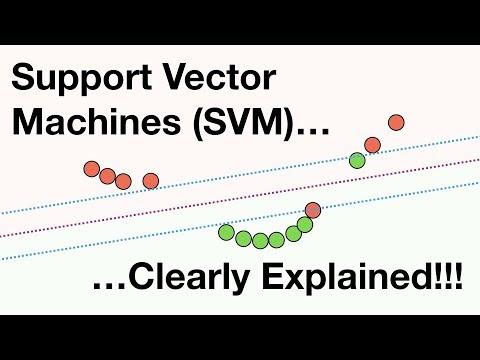

In [2]:
from IPython.display import YouTubeVideo
from datetime import timedelta
start=int(timedelta(hours=0, minutes=4, seconds=30).total_seconds())
end=int(timedelta(hours=0, minutes=12, seconds=10).total_seconds())
YouTubeVideo("efR1C6CvhmE",width=800,height=450,start=start,end=end)

&#9989; **Question 2:** Why do soft margins help us to construct a better classification model?

<font size=+3>&#9998;</font> Because they make the model less susceptible to outliers.

---
## 2. Linear Separable Data

In a 2-class classification task, when we place example observations in a feature space, we say that the data is "linearly separable" if we can draw a line in the space such that all the observations fall to one side of the line or the other. Those on one side of the line are of "class 1" and the other side "class 2". This may or may not completely possible, but that is the goal. We will see that some problems have data that is fundamentally **not** linearly separable, but we will get to that eventually. For this introduction, we will work with linearly separable data.

### 2.1 `sklearn` data generators

We mentioned `sklearn` data generator `make_classification` our Logistic Regression activity. It turns out the package `sklearn.datasets` has a number data generators that generate data that can be used to test model building. We will use one here to generate a dataset that is "linearly separable" and against which we can test our SVM classifier.

It is worth your time to take a look at the documentation of <a href="https://scikit-learn.org/stable/datasets.html"> scikit-learn datasets page </a> to see the rich set of dataset support `sklearn` provides. However, we are particularly interested in <a href="https://scikit-learn.org/stable/datasets/sample_generators.html"> Section 7.3</a>, where they've listed a number of ways to generate artificial data with certain characteristics.

### 2.2 `sklearn.datasets.make_blobs`

Let's look at the `make_blobs` function. To start, you should review the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html">documentation page</a>. The `make_blobs` function can generate a set of data that is linearly separable, good for what we want to do. You should pay particular attention to:
* `n_samples`
* `n_features`
* `centers`
* `random_state`

**Make sure you also review what `make_blobs` returns.**

&#9989; **Do This**: Using the documentation, create an example data set with two "blobs", a 2-class data set. It should have:
- 100 samples
- two classes (or two "blobs" that represent two different classes) and 2 features
- a consistent `random_state` value so that you can generate the same "blobs" every time. Try to find a `random_state` where the blobs are clearly separated.

In [13]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, random_state=12)

### 2.3 Graph the "blobs"

Without visualization our results, it's hard to tell what we ended up with! 

&#9989; **Do This**: Graph the result of the `make_blobs` operation. Color all the elements of one class one color and the elements of the other class the other color.

There is more than way to you can use the class information to color the plot. Things to consider and watch for:
- you can create a list/array with color assignments for each data element based on their class
- you can use any of the various color maps matplotlib provides
- play with the `random_state` value and see if you can get some "blobs" that are relatively "close" to each other. It should be the case that if you use the same `random_state` value each time that you get the same distribution of data. Remember, "random" means "relatively random" here. That is, predicting the next value in a sequence should be (statistically speaking) random. However, start with the same seed value (which is what `random_state` is for this process) so that you get the exact same sequence when you re-run the code.

Text(0, 0.5, 'Second feature')

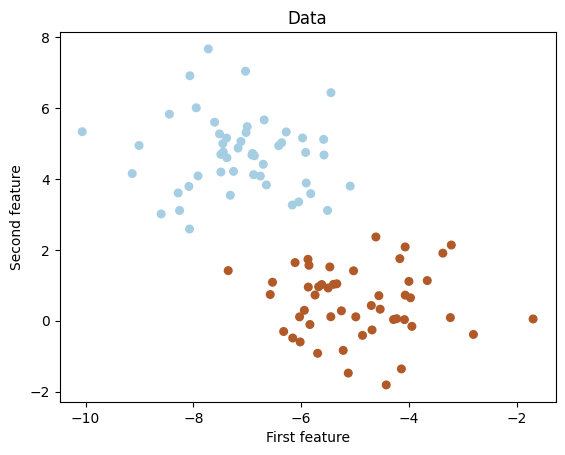

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired) 
plt.title("Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")


---
## 3. Separating the blobs

For linearly separable data, an SVM tries to find how to separate the classes using a hyperplane. For cleanly separated data in 2-dimensions, like the data set you constructed this hyperplane is simply a line. The next part of the video below explains how an SVM does this for more complicated data or data that is not cleanly separable in it's original dimensions. Effectively, SVMs create additional dimensions based on a set of rules that we specify (in this "linear" case using linear functions).

&#9989; **Do This**: Watch the next part of the video below and answer the question that follows.

In [ ]:
from IPython.display import YouTubeVideo
from datetime import timedelta
start=int(timedelta(hours=0, minutes=12, seconds=10).total_seconds())
end=int(timedelta(hours=0, minutes=17, seconds=29).total_seconds())
YouTubeVideo("efR1C6CvhmE",width=800,height=450,start=start,end=end)

&#9989; **Question 3:** Creating a model that produces new dimensions from our data to classify our labels better seems pretty great. But what problems do you see with doing this? Consider how you might interpret the results of such a model.

<font size=+3>&#9998;</font> It can rapidly become mathematically complicated and computationally intensive as you add more dimensions.

### 3.1 Draw a line of separation

Looking back at your graph of the blobs, you should be able to see by eye a line that might work to separate these data. An SVM will do this automatically, but let's try to draw a line that separates the two classes, the two blobs. 

&#9989; **Do This**: Make a plot of the blobs again and this time add a line such that the two blobs are separated. You will have to work out the slope and intercept for this line to fit it in your plot. Your line doesn't have to be perfect, just try to find something that looks close to right.

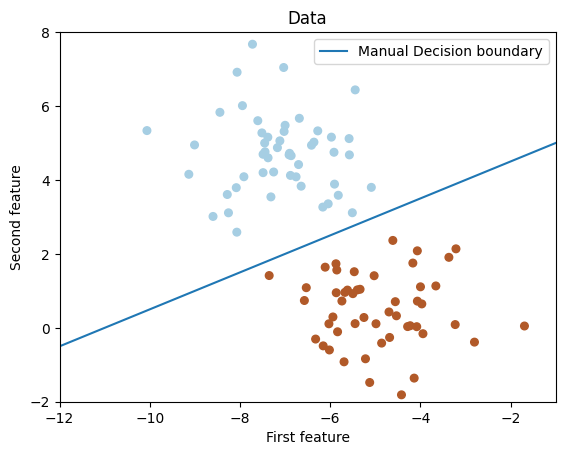

In [24]:
x = np.linspace(-20, 10, 100)
y = 5.5 + x*0.5
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired) 
plt.ylim(-2,8)
plt.xlim(-12,-1)
plt.plot(x,y,label="Manual Decision boundary")
plt.title("Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend()

If there exists such a line that separates to the two classes and you remember the basic equation for a line, here are two questions:
1. Given a boundary line, how could you predict for a new observation which class it was (what would be the equation you could use)?
1. How might we draw the "optimal" line? What would "optimal" mean in this situation?

If you weren't able to get this worked out, that's OK! We'll talk about it in class.

<font size=+3>&#9998;</font> all data above the line is the data class that is cyan in my graph, and all data below it the data class that in my graph is brown.

<font size=+3>&#9998;</font> For each class we take the 10% of points that are closest to the other blob's center of mass, and then using the average position of that 10% of points we draw a line that for each point in the line is equally far from the 10% center of mass of each blob.

---
## Follow-up Questions

Copy and paste the following questions into the appropriate box in the assignment survey include below and answer them there. (Note: You'll have to fill out the assignment number and go to the "NEXT" section of the survey to paste in these questions.)

1. Copy bullets #1 and #2 from above along with your answers and include them in your survey responses. If you didn't come up with an answer to these questions, indicate that as well.

----
# Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [25]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse202-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your name in the first cell).

&#169; Copyright 2023 Department of Computational Mathematics, Science and Engineering at Michigan State University